# <center> <font color=maroon>Image Classification Using CNN Model and Data Pipeline</font></center>


### The Notebook uses VGG-5 to build a baseline CNN model to establish a baseline performance on the cats-and-dogs dataset.

## The Cats & Dogs Dataset

* #### You can download the photos folders from Kaggle: https://www.kaggle.com/c/dogs-vs-cats
* #### Download train.zip and unzip the 25000 files and move them to a folder and make a note of the file path

### Import Toolsets

In [16]:
import os, itertools 
import time
import random, shutil  # shutil is a utility for file system operations
import numpy as np 
import pandas as pd
from random import shuffle
 
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split

### Import TensorFlow and Keras

In [4]:
import tensorflow as tf
from tensorflow import keras

### Load CNN Modules

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout

### Image Preprocessing tool

In [6]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory

<a name='1'></a>
## <font color= blue> Load and Process the Dataset</font>

One of the more time consuming, yet critcally important step, is to prepare the dataset to be ready for the neural network training workflow. After retreiving the data files (images of dogs and cats, 25,000 each), we perform the following tasks: 
* `Randomly pick a subset of $N$ samples from the training dataset.` This step is only for learning purposes to give you the experience of deep learning on small dataset. Once you are ready to train the entire dataset, you can skip this step. Nonetheless, this step illustrates some Python directory commands that can be useful.

### Create a directory and store $N$ image files into three subdirectories:
<img src="train_test_dir.png" alt="Drawing" style="width: 200px;"/>

In [56]:
# Source directory containing all images
source_dir = "./train"

# Destination directory where you want to save the subset
train_sub_path = './cat_dog_6000'

# Create the subset directory if it doesn't exist
os.makedirs(train_sub_path, exist_ok=True)


In [57]:
def make_subset (subset_name, st_index, end_index):
    for category in ("cat", "dog"):
        dest = train_sub_path + '/' + subset_name + '/' + category
        os.makedirs(dest, exist_ok=True)
        
        files = [f"{category}.{i}.jpg" for i in range(st_index, end_index)]  # list of catxxx.jpg, dogxxx.jpg
        for f in files:
            shutil.copy(src=source_dir + '/' + f, dst=dest + '/ '+ f)

In [58]:
make_subset("train", st_index=0, end_index=1500)
make_subset("validation", st_index=1500, end_index=2000)
make_subset("test", st_index=2000, end_index=3000)

### Move $N$ randomly selected images to the destination sub-directories

### Randomly pick an image from the newly created train set

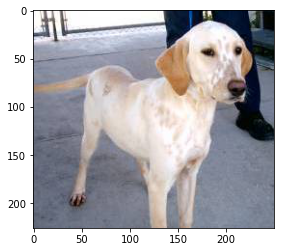

In [74]:
directory = os.listdir(train_sub_path+'/test'+'/dog')
sample = random.choice(directory)

img = load_img(os.path.join(train_sub_path+'/test'+'/dog', sample))

plt.imshow(img)
plt.show()

### Create image data pipeline

In [60]:
# create data generator
datagen = ImageDataGenerator(rescale=1.0/255.0)

train_data = datagen.flow_from_directory(train_sub_path + '/train',
            class_mode='binary', batch_size=64, target_size=(64, 64))

val_data = datagen.flow_from_directory(train_sub_path + '/validation',
           class_mode='binary', batch_size=64, target_size=(64, 64))

test_data = datagen.flow_from_directory(train_sub_path + '/test',
            class_mode='binary', batch_size=64, target_size=(64, 64))

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


 <a name='2'></a>
## <font color= blue> Build a Baseline CNN (VGG-5) Model</font>

**A `baseline model` will establish a minimum model performance to which all of your other models can be compared, as well as a model architecture that we can use as the basis of study and improvement.**

**A good starting point is the general architectural principles of the `VGG models`, which we discussed in class. Not only because they achieved top performance in the ILSVRC 2014 competition but also the modular structure of the architecture is easy to understand and implement.**

<a name='1-1'></a>
### <font color=blue> Define the CNN model </font>

In [62]:
model = Sequential()

# Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))

# Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

# FC Layers
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)       

<a name='2-2'></a>
## <font color=blue> Train and Fit and Model </font>

In [64]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(train_data, epochs=20, batch_size=64, validation_data=val_data, verbose=1)

Epoch 1/20
47/47 [==============================] - 8s 166ms/step - loss: 0.6975 - accuracy: 0.5030 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 2/20
47/47 [==============================] - 7s 153ms/step - loss: 0.6877 - accuracy: 0.5497 - val_loss: 0.6700 - val_accuracy: 0.6010
Epoch 3/20
47/47 [==============================] - 8s 161ms/step - loss: 0.6622 - accuracy: 0.5887 - val_loss: 0.6499 - val_accuracy: 0.6340
Epoch 4/20
47/47 [==============================] - 7s 152ms/step - loss: 0.6263 - accuracy: 0.6500 - val_loss: 0.6186 - val_accuracy: 0.6690
Epoch 5/20
47/47 [==============================] - 7s 150ms/step - loss: 0.5730 - accuracy: 0.6983 - val_loss: 0.5878 - val_accuracy: 0.6820
Epoch 6/20
47/47 [==============================] - 7s 151ms/step - loss: 0.5336 - accuracy: 0.7280 - val_loss: 0.6305 - val_accuracy: 0.6770
Epoch 7/20
47/47 [==============================] - 7s 152ms/step - loss: 0.5058 - accuracy: 0.7507 - val_loss: 0.5718 - val_accuracy: 0.6970
Epoch 

### Compare Loss and Accuracy Performance for train and validation data

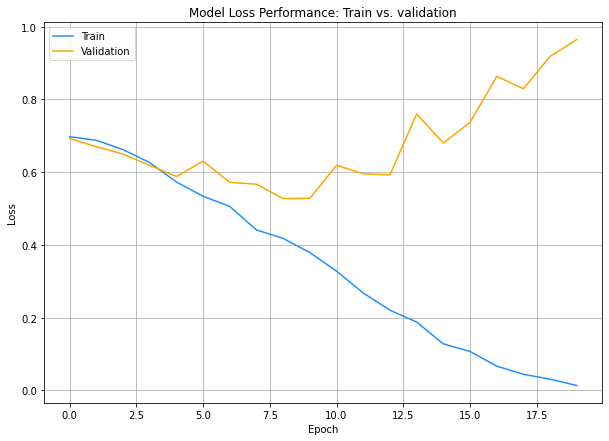

In [71]:
J = history.history['loss']  # Loss data for Training 
J_val = history.history['val_loss']

plt.figure(figsize=(10,7))

plt.title('Model Loss Performance: Train vs. validation')
plt.plot(J, color='DodgerBlue', label='Train')
plt.plot(J_val, color='orange', label='Validation')

plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend()
plt.grid()
plt.show()

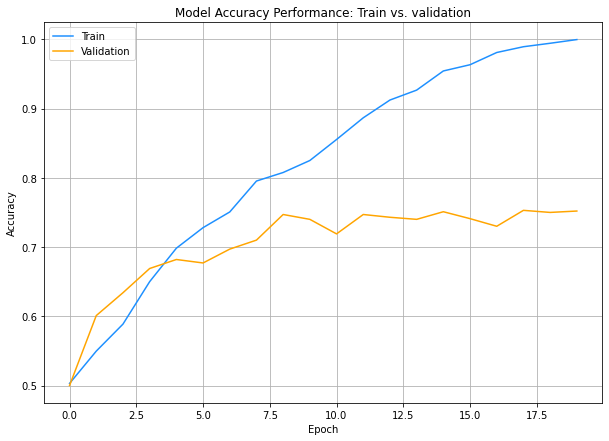

In [72]:
accu = history.history['accuracy']  # Loss data for Training 
accu_val = history.history['val_accuracy']

plt.figure(figsize=(10,7))

plt.title('Model Accuracy Performance: Train vs. validation')
plt.plot(accu, color='DodgerBlue', label='Train')
plt.plot(accu_val, color='orange', label='Validation')

plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend()
plt.grid()
plt.show()

#### <font color=blue> Notice that the accuracy on train data continues to improve till it reaches 100%. </font>
####  <font color=blue>However, the accuracy on the validation data plateaus at `75% after 10 epoch`. This is a classic case of `overfitting`.</font>

<a name='2-3'></a>
### <font color=blue> Test and Evaluate the Model </font>

In [73]:
loss, accuracy = model.evaluate(test_data, verbose=1)

y_pred = model.predict(test_data)

32/32 [==============================] - 3s 93ms/step


#### <font color=blue> Evaluation on the test data confirms the accuracy is only `76%`. It's better than the MLP model, but there is room for improvement.</font> 

### Predicted target output, Y (Cat or Dog)

In [70]:
Y_pred = np.rint(y_pred)    # Binary decision on the image. 1 = Dog, 0 = Cat

1035.0

In [81]:
print (f"There are {int(Y_pred.sum())} images classified as dogs")   

There are 1035 images classified as dogs
